In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import re


In [66]:
data = pd.read_csv('./job_offers_2024_08_18.csv', sep=';', decimal='.', encoding='UTF-8')
data.head()

,Name,Company,Location,Technologies,Salary Low,Salary High,Currency,Salary_avg,Country,Senior,Pozice
0,mid sql data analyst,Ośrodek Przetwarzania Informacji - Państwowy I...,warsaw,Data SQL pandas Python,8000.0,10000.0,PLN,9000.0,PL,0,analyst
1,data analyst,Ferrosan Medical Devices,szczecin,Data Python Degree Data science,14000.0,24000.0,PLN,19000.0,PL,0,analyst
2,data analyst,Volvo Group,wrocław,Data SQL Azure Power BI,12000.0,18000.0,PLN,15000.0,PL,0,analyst
3,qa/ data analyst,AVENGA,wrocław,Testing SQL QlikView PySpark,16800.0,20000.0,PLN,18400.0,PL,0,analyst
4,data analyst,Cognitum Services SA,warsaw,Data AWS SQL Data analysis,17000.0,23000.0,PLN,20000.0,PL,0,analyst


# 1.Kolik pracovních míst pro konkrétní pozici bylo nalezeno?  
job_names = ['data analyst', 'data engineer', 'data scientist']

In [67]:
scientist = data.loc[data['Name'].apply(lambda x: True if re.search('scientist', x) else False),]

In [68]:
analyst = data.loc[data['Name'].apply(lambda x: True if re.search('analyst', x) else False),]

In [69]:
engineer = data.loc[data['Name'].apply(lambda x: True if re.search('engineer', x) else False),]

In [70]:
print(f'Number of Analyst jobs is {analyst.shape[0]}' )
print(f'Number of Engineer jobs is {engineer.shape[0]}' )
print(f'Number of Scientist jobs is {scientist.shape[0]}' )

Number of Analyst jobs is 7
Number of Engineer jobs is 139
Number of Scientist jobs is 21


# 2. Jaká je průměrná mzda za každou práci?


In [71]:
analyst_avg = round(analyst['Salary_avg'].mean(), 2)
engineer_avg = round(engineer['Salary_avg'].mean(), 2)
scientist_avg = round(scientist['Salary_avg'].mean(), 2)
print ('Average salary for position Analyst:', analyst_avg, 'PLN')
print ('Average salary for position Engineer:', engineer_avg, 'PLN')
print ('Average salary for position Scientist:', scientist_avg, 'PLN')

Average salary for position Analyst: 15771.43 PLN
Average salary for position Engineer: 24561.27 PLN
Average salary for position Scientist: 24115.67 PLN


# 3. Které město má nejvíce pracovních nabídek?

In [72]:
data['Location'].unique()

array(['warsaw', 'szczecin', 'wrocław', 'remote', 'gdynia', 'poznań',
       'tczew', 'gdańsk', 'ostrów', 'kraków', 'kobyłka', 'łódź'],
      dtype=object)

In [73]:
data_grouped_by_location = data.groupby('Location')

for (locations, grouped_data) in data_grouped_by_location:
    print(f"There are {len(grouped_data)} job offers in {locations}.")


There are 4 job offers in gdańsk.
There are 6 job offers in gdynia.
There are 1 job offers in kobyłka.
There are 17 job offers in kraków.
There are 1 job offers in ostrów.
There are 5 job offers in poznań.
There are 148 job offers in remote.
There are 1 job offers in szczecin.
There are 2 job offers in tczew.
There are 30 job offers in warsaw.
There are 3 job offers in wrocław.
There are 4 job offers in łódź.


# 4. Kde je nabízena nejvyšší sazba?

In [74]:
data_grouped_by_location['Salary High'].max()



Location
gdańsk      29400.0
gdynia      32000.0
kobyłka     20000.0
kraków      40000.0
ostrów      10000.0
poznań      26376.0
remote      40000.0
szczecin    24000.0
tczew       20000.0
warsaw      64000.0
wrocław     21000.0
łódź        29400.0
Name: Salary High, dtype: float64

In [75]:
print(f"The highest salary is in Warsaw with 42000 PLN salary.")

The highest salary is in Warsaw with 42000 PLN salary.


# 5. Jaký je rozdíl mezi nabídkou pro běžného a seniora ?

In [76]:
result = data.groupby('Senior').agg(
    count=('Senior', 'size'),
    avg_salary=('Salary_avg','mean')
).reset_index()
round(result, 2)

,Senior,count,avg_salary
0,0,127,23218.75
1,1,95,25347.22


In [77]:
print("The average salary for a regular employee is 22652.45 PLN. while for a senior it is 25434.26 PLN.")

The average salary for a regular employee is 22652.45 PLN. while for a senior it is 25434.26 PLN.


# 6. Jaké jsou nejnižší možné náklady na pronájem týmu složeného z datového analytika, datového inženýra a datového vědce?

In [78]:
analyst_min = round(analyst['Salary Low'].min(), 2)
engineer_min = round(engineer['Salary Low'].min(), 2)
scientist_min = round(scientist['Salary Low'].min(), 2)
print ('Minimum salary per position Analyst:', analyst_min, 'PLN')
print ('Minimum salary per position Engineer:', engineer_min, 'PLN')
print ('Minimum salary per position Scientist:', scientist_min, 'PLN')

data.head()

Minimum salary per position Analyst: 8000.0 PLN
Minimum salary per position Engineer: 4500.0 PLN
Minimum salary per position Scientist: 14280.0 PLN


,Name,Company,Location,Technologies,Salary Low,Salary High,Currency,Salary_avg,Country,Senior,Pozice
0,mid sql data analyst,Ośrodek Przetwarzania Informacji - Państwowy I...,warsaw,Data SQL pandas Python,8000.0,10000.0,PLN,9000.0,PL,0,analyst
1,data analyst,Ferrosan Medical Devices,szczecin,Data Python Degree Data science,14000.0,24000.0,PLN,19000.0,PL,0,analyst
2,data analyst,Volvo Group,wrocław,Data SQL Azure Power BI,12000.0,18000.0,PLN,15000.0,PL,0,analyst
3,qa/ data analyst,AVENGA,wrocław,Testing SQL QlikView PySpark,16800.0,20000.0,PLN,18400.0,PL,0,analyst
4,data analyst,Cognitum Services SA,warsaw,Data AWS SQL Data analysis,17000.0,23000.0,PLN,20000.0,PL,0,analyst


# 7. Je možné, aby tým vznikl v jednom městě? Pokud ano, kde by to bylo nejlevnější?

In [79]:
pivot = data.pivot_table(
    index='Location', 
    columns= 'Pozice', 
    aggfunc='size', 
    fill_value=0
    )

pivot

Pozice,0,analyst,engineer,scientist
Location,,,,
gdańsk,4,0,0,0
gdynia,4,0,0,2
kobyłka,1,0,0,0
kraków,3,0,13,1
ostrów,0,0,1,0
poznań,2,0,3,0
remote,27,0,111,10
szczecin,0,1,0,0
tczew,2,0,0,0


Ano pouze ve Warsaw

In [80]:
pivot = data.pivot_table(
    index='Location', 
    columns= 'Pozice', 
    values='Salary Low',
    aggfunc='min', 
    fill_value=0
    )

pivot

Pozice,0,analyst,engineer,scientist
Location,,,,
gdańsk,25200.0,0.0,0.0,0.0
gdynia,12000.0,0.0,0.0,17000.0
kobyłka,17000.0,0.0,0.0,0.0
kraków,28000.0,0.0,17000.0,26000.0
ostrów,0.0,0.0,5500.0,0.0
poznań,18000.0,0.0,19320.0,0.0
remote,7000.0,0.0,7000.0,16198.0
szczecin,0.0,14000.0,0.0,0.0
tczew,17000.0,0.0,0.0,0.0


# Kromě toho vizualizujte podsekce 1–5 pomocí typů grafů podle vašeho výběru.

## 1. Graf - počet pozic

In [81]:
num_analyst = analyst.shape[0]
num_engineer = engineer.shape[0]
num_scientist = scientist.shape[0]

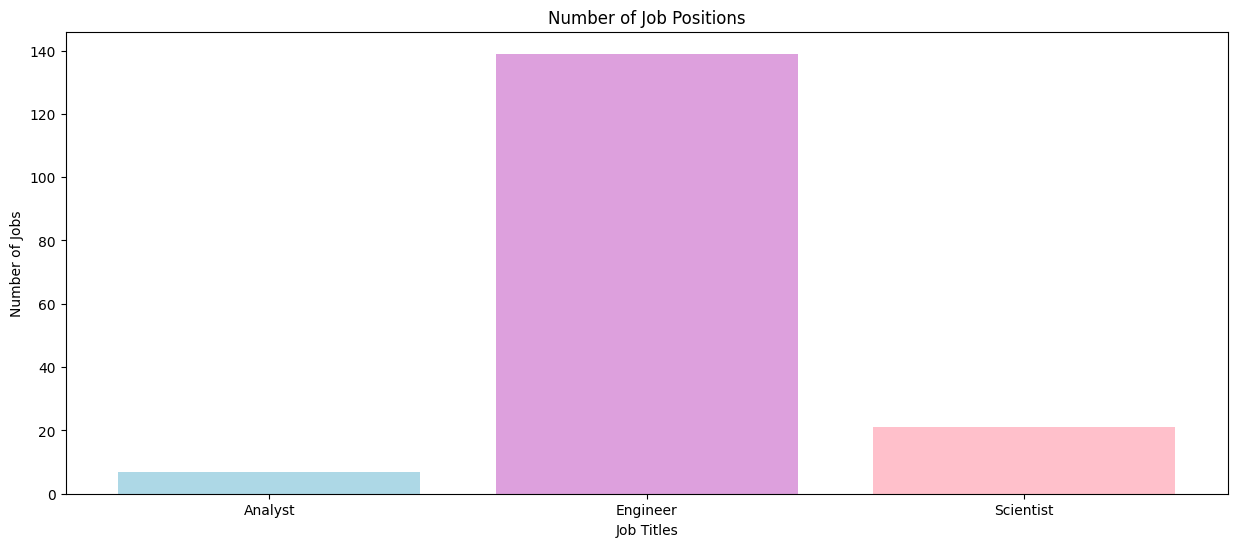

In [82]:
categories = ['Analyst', 'Engineer', 'Scientist']
counts = [num_analyst, num_engineer, num_scientist]

plt.figure(figsize=(15, 6))
plt.bar(categories, counts, color=['lightblue', 'plum', 'pink'])
plt.xlabel('Job Titles')
plt.ylabel('Number of Jobs')
plt.title('Number of Job Positions')
plt.show()

## 2. Graf - Jaká je průměrná mzda za každou pozici?

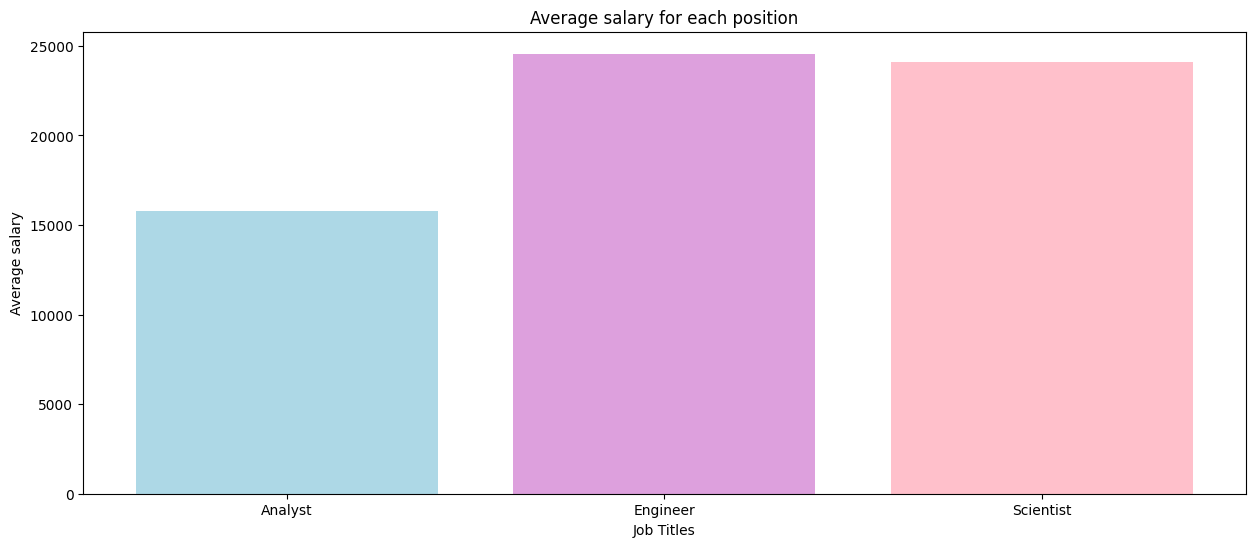

In [83]:
categories = ['Analyst', 'Engineer', 'Scientist']
counts = [analyst_avg, engineer_avg, scientist_avg]

plt.figure(figsize=(15, 6))
plt.bar(categories, counts, color=['lightblue', 'plum', 'pink'])
plt.xlabel('Job Titles')
plt.ylabel('Average salary')
plt.title('Average salary for each position')
plt.show()

## 3. Graf - kolik pozic je v každém městě?

In [84]:

filtered_data = data[~data['Location'].str.contains('remote')]


data_grouped_by_location = filtered_data.groupby('Location')





In [85]:

filtered_data = data[~data['Location'].str.contains('Remote', case=False, na=False)]


data_grouped_by_location = filtered_data.groupby('Location')

locations = []
counts = []

for location, grouped_data in data_grouped_by_location:
    print(f"There are {len(grouped_data)} job offers in {location}.")

    locations.append(location)
    counts.append(len(grouped_data))

locations
counts

There are 4 job offers in gdańsk.
There are 6 job offers in gdynia.
There are 1 job offers in kobyłka.
There are 17 job offers in kraków.
There are 1 job offers in ostrów.
There are 5 job offers in poznań.
There are 1 job offers in szczecin.
There are 2 job offers in tczew.
There are 30 job offers in warsaw.
There are 3 job offers in wrocław.
There are 4 job offers in łódź.


[4, 6, 1, 17, 1, 5, 1, 2, 30, 3, 4]

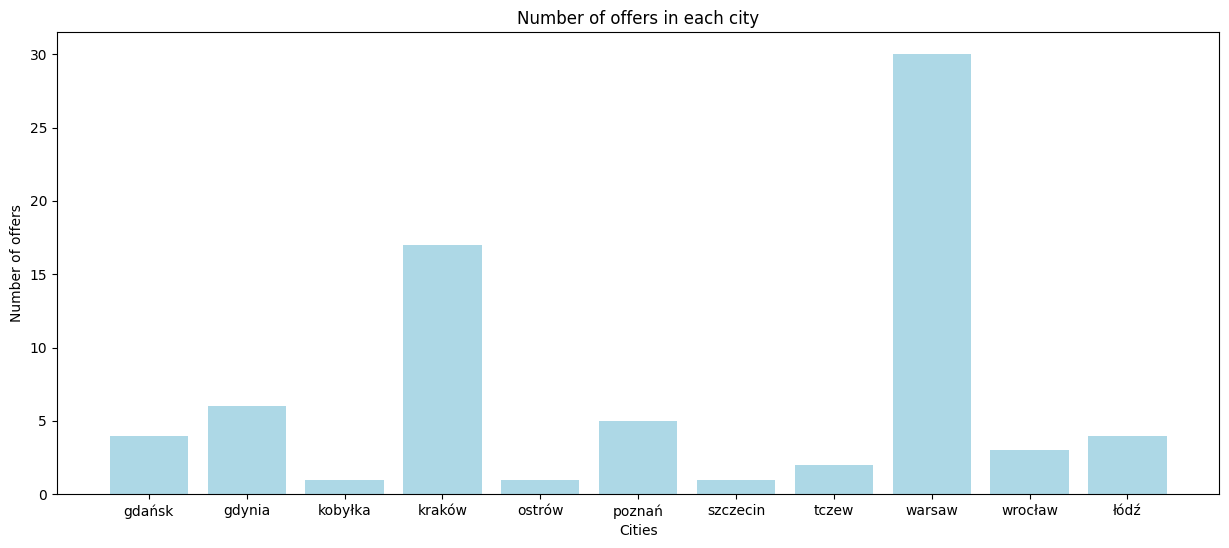

In [86]:
# Vytvoření grafu
plt.figure(figsize=(15, 6))
plt.bar(locations, counts, color = 'lightblue')
plt.xlabel('Cities')
plt.ylabel('Number of offers')
plt.title('Number of offers in each city')
plt.show()

## 4. Graf - kde je nejvyšší sazba? 

In [87]:
counts_max = data_grouped_by_location['Salary High'].max()

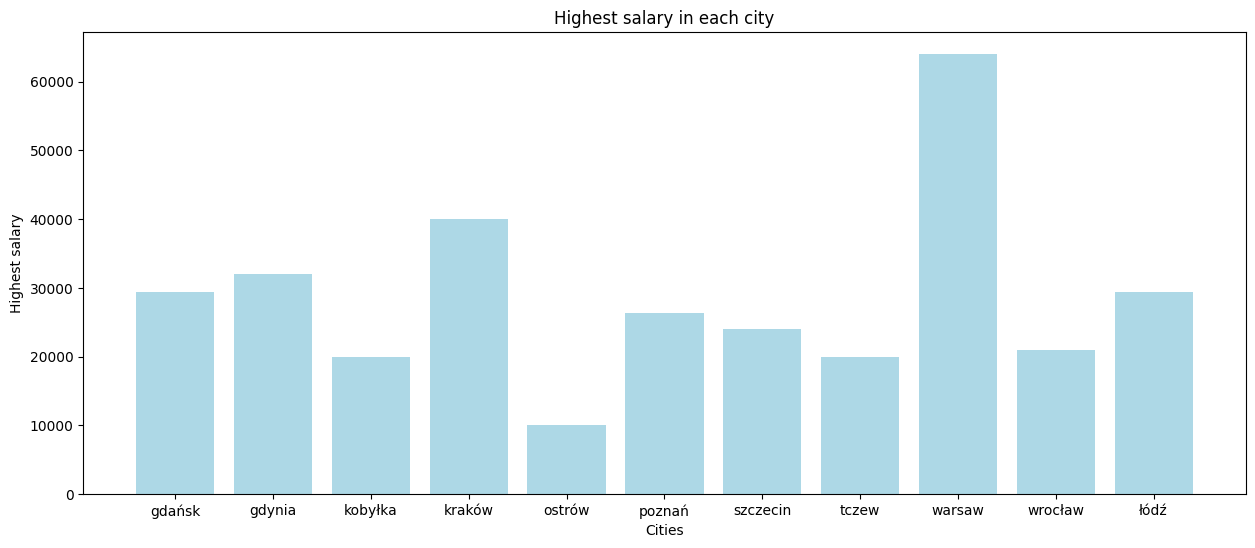

In [88]:
plt.figure(figsize=(15, 6))
plt.bar(locations, counts_max, color = 'lightblue')
plt.xlabel('Cities')
plt.ylabel('Highest salary')
plt.title('Highest salary in each city')
plt.show()

# 5. Graf jaký je rozdíl mezi nabídkou pro běžného a seniora ?

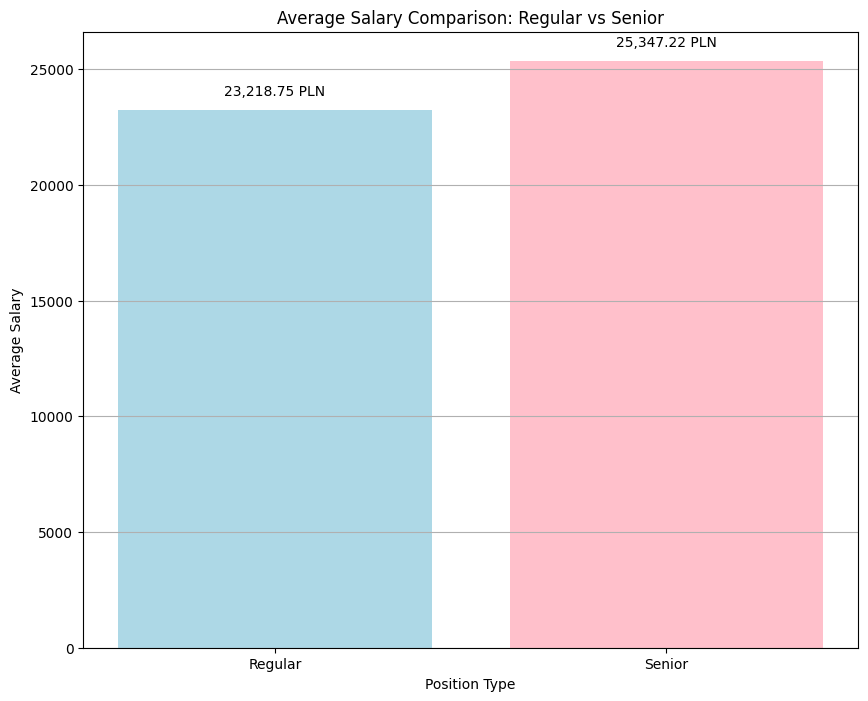

In [89]:

regular_salary = result.loc[result['Senior'] == 0, 'avg_salary'].values[0]
senior_salary = result.loc[result['Senior'] == 1, 'avg_salary'].values[0]
salary_difference = senior_salary - regular_salary

categories = ['Regular', 'Senior']
salaries = [regular_salary, senior_salary]

plt.figure(figsize=(10, 8))
plt.bar(categories, salaries, color=['lightblue', 'pink'])
plt.xlabel('Position Type')
plt.ylabel('Average Salary')
plt.title('Average Salary Comparison: Regular vs Senior')
plt.grid(axis='y')

for i, value in enumerate(salaries):
    plt.text(i, value + 500, f'{value:,.2f} PLN', ha='center', va='bottom')